<a href="https://colab.research.google.com/github/yustinachang/1121_20009_Digital-Image-Processing-and-Analysis/blob/main/HW6/231117_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#OpenCV 五官偵測 ( 眼睛、鼻子、嘴巴 )

##匯入OpenCV套件

In [ ]:
import cv2

##下載人臉特徵模型

人臉特徵模型：[haarcascade_frontalface_default.xml](https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_default.xml) <br>
眼睛特徵模型：[haarcascade_eye.xml](https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_eye.xml) <br>
嘴巴特徵模型：[haarcascade_mcs_mouth.xml](https://raw.githubusercontent.com/atduskgreg/opencv-processing/master/lib/cascade-files/haarcascade_mcs_mouth.xml) <br>
鼻子特徵模型：[haarcascade_mcs_nose.xml](https://raw.githubusercontent.com/atduskgreg/opencv-processing/master/lib/cascade-files/haarcascade_mcs_nose.xml) <br>
https://github.com/atduskgreg/opencv-processing/tree/master/lib/cascade-files

##偵測人臉、眼睛、鼻子和嘴巴

###使用OpenCV讀取圖片

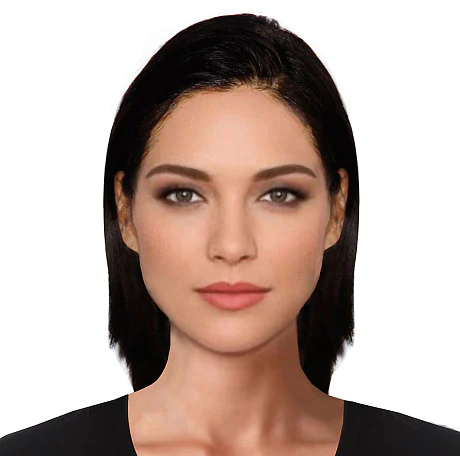

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#img = cv2.imread('/content/drive/My Drive/Colab Notebooks/test.jpeg')
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/test01.jpg')
cv2_imshow(img)

##影像裁切

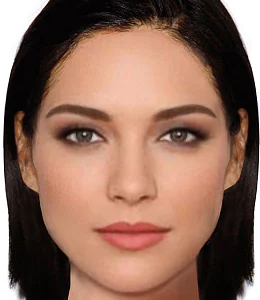

In [ ]:
x=100
y=60
w=260
h=300
img = img[y:y+h, x:x+w]
cv2_imshow(img)
#cv2.imwrite('output.jpg',img)

##影像轉換

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # 圖片轉灰階
#gray = cv2.medianBlur(gray, 5)                # 如果一直偵測到雜訊，可使用模糊的方式去除雜訊

##偵測人臉

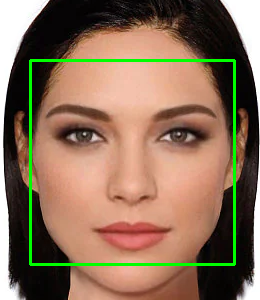

In [ ]:
face_cascade = cv2.CascadeClassifier("/content/drive/My Drive/Colab Notebooks/haarcascade_frontalface_default.xml")   # 載入人臉模型
faces = face_cascade.detectMultiScale(gray)    # 偵測人臉

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv2_imshow(img)

##偵測眼睛並進行標註

cv2.rectangle(影像, 頂點座標, 對向頂點座標, 顏色, 線條寬度)

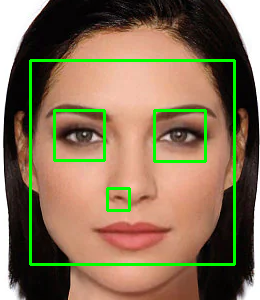

In [ ]:
eye_cascade = cv2.CascadeClassifier("/content/drive/My Drive/Colab Notebooks/haarcascade_eye.xml")  # 使用眼睛模型
eyes = eye_cascade.detectMultiScale(gray)                       # 偵測眼睛

for (x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)      # 標記綠色方框
cv2_imshow(img)

##偵測嘴巴並進行標註

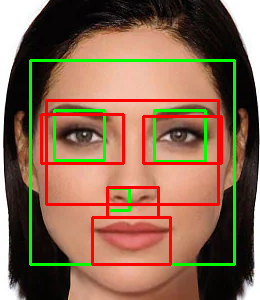

In [ ]:
mouth_cascade = cv2.CascadeClassifier("/content/drive/My Drive/Colab Notebooks/haarcascade_mcs_mouth.xml")  # 使用嘴巴模型
mouths = mouth_cascade.detectMultiScale(gray)                           # 偵測嘴巴
for (x, y, w, h) in mouths:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)             # 標記紅色方框
cv2_imshow(img)

##偵測鼻子並進行標註

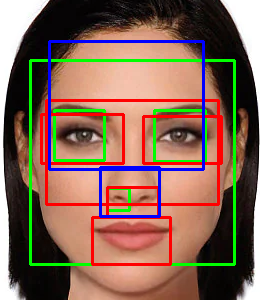

In [ ]:
nose_cascade = cv2.CascadeClassifier("/content/drive/My Drive/Colab Notebooks/haarcascade_mcs_nose.xml")    # 使用鼻子模型
noses = nose_cascade.detectMultiScale(gray)                             # 偵測鼻子
for (x, y, w, h) in noses:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)              # 標記藍色方框
cv2_imshow(img)

#OpenCV訓練人臉辨識模型

##安裝所需套件

In [ ]:
!pip install opencv_contrib_python

##訓練人臉辨識模型

In [ ]:
import cv2
import numpy as np
detector = cv2.CascadeClassifier('/content/drive/My Drive/Colab Notebooks/haarcascade_frontalface_default.xml')  # 載入人臉追蹤模型
recog = cv2.face.LBPHFaceRecognizer_create()  # 啟用訓練人臉模型方法
faces = []   # 儲存人臉位置大小的串列
ids = []     # 記錄該人臉 id 的串列

for i in range(1,6):
    img = cv2.imread(f'/content/drive/My Drive/Colab Notebooks/iu{i}.jpeg')  # 依序開啟每一張照片
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # 色彩轉換成黑白
    img_np = np.array(gray,'uint8')               # 轉換成指定編碼的 numpy 陣列
    face = detector.detectMultiScale(gray)        # 擷取人臉區域
    for(x,y,w,h) in face:
        faces.append(img_np[y:y+h,x:x+w])         # 記錄人臉的位置和大小內像素的數值
        ids.append(1)                             # 記錄人臉對應的 id，只能是整數，都是 1 表示此人臉的 id 為 1

print('training...')                              # 提示開始訓練
recog.train(faces,np.array(ids))                  # 開始訓練
recog.save('/content/drive/My Drive/Colab Notebooks/face.yml')  # 訓練完成儲存為 face.yml
print('ok!')

training...
ok!


##使用自訓練模型「辨識人臉」

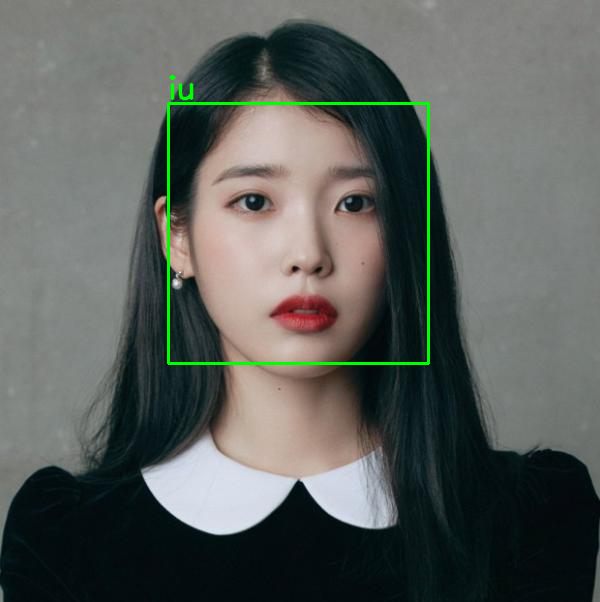

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

recognizer = cv2.face.LBPHFaceRecognizer_create()         # 啟用訓練人臉模型方法
recognizer.read('/content/drive/My Drive/Colab Notebooks/face.yml')                               # 讀取人臉模型檔
cascade_path = "/content/drive/My Drive/Colab Notebooks/haarcascade_frontalface_default.xml"  # 載入人臉追蹤模型
face_cascade = cv2.CascadeClassifier(cascade_path)        # 啟用人臉追蹤
img = cv2.imread('/content/drive/My Drive/Colab Notebooks/iu3.jpeg')

#img = cv2.resize(img,(540,300))              # 縮小尺寸，加快辨識效率
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)  # 轉換成黑白
faces = face_cascade.detectMultiScale(gray)  # 追蹤人臉 ( 目的在於標記出外框 )

# 建立姓名和 id 的對照表
name = {
    '1':'iu',

}

# 依序判斷每張臉屬於哪個 id
for(x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)            # 標記人臉外框
    idnum,confidence = recognizer.predict(gray[y:y+h,x:x+w])  # 取出 id 號碼以及信心指數 confidence
    if confidence < 60:
        text = name[str(idnum)]                               # 如果信心指數小於 60，取得對應的名字
    else:
        text = '???'                                          # 不然名字就是 ???
    # 在人臉外框旁加上名字
    cv2.putText(img, text, (x,y-5),cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2, cv2.LINE_AA)

cv2_imshow(img)


#Mediapipe五官偵測(取得五官座標)

##安裝mediapipe

In [ ]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 31.9 MB/s eta 0:00:00


##使用Mediapipe進行偵測
cv2.circle(影像, 圓心座標, 半徑, 顏色, 線條寬度)
*斜體文字*

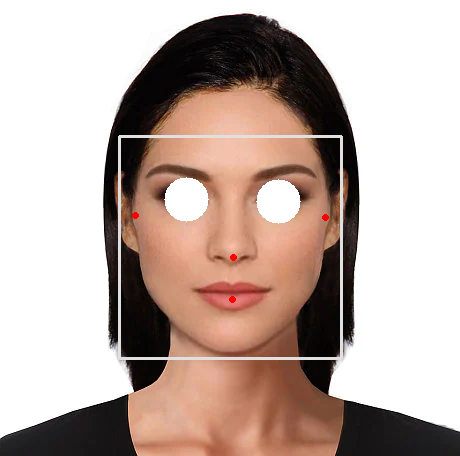

In [ ]:
import cv2
import mediapipe as mp     # 載入 mediapipe 函式庫

img = cv2.imread('/content/drive/My Drive/Colab Notebooks/test01.jpg')

mp_face_detection = mp.solutions.face_detection   # 建立偵測方法
mp_drawing = mp.solutions.drawing_utils           # 建立繪圖方法


with mp_face_detection.FaceDetection(             # 開始偵測人臉
    model_selection=0, min_detection_confidence=0.5) as face_detection:

    size = img.shape   # 取得影像尺寸
    w = size[1]        # 取得畫面寬度
    h = size[0]        # 取得畫面高度
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # 將 BGR 顏色轉換成 RGB
    results = face_detection.process(img2)        # 偵測人臉

    for detection in results.detections:
        mp_drawing.draw_detection(img, detection)  # 標記人臉

        s = detection.location_data.relative_bounding_box     # 取得人臉尺寸
        eye = int(s.width*w*0.1)                              # 計算眼睛大小 ( 人臉尺寸*0.1 )

        a = detection.location_data.relative_keypoints[0]     # 取得左眼座標
        b = detection.location_data.relative_keypoints[1]     # 取得右眼座標
        ax, ay = int(a.x*w), int(a.y*h)                       # 計算左眼真正的座標
        bx, by = int(b.x*w), int(b.y*h)                       # 計算右眼真正的座標

        cv2.circle(img,(ax,ay),(eye),(255,255,255),-1)     # 畫左眼白色大圓 ( 白眼球 )
        cv2.circle(img,(bx,by),(eye),(255,255,255),-1)     # 畫右眼白色大圓 ( 白眼球 )

    cv2_imshow(img)

#Deepface情緒辨識

##安裝Deepface

In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 12.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116933 sha256=111917d895db33e9658acd95313099537ea8977a04945bb048f6f9e794638574
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


##情緒辨識

Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]




dominant_emotion: happy ( 99.55610036849976 )


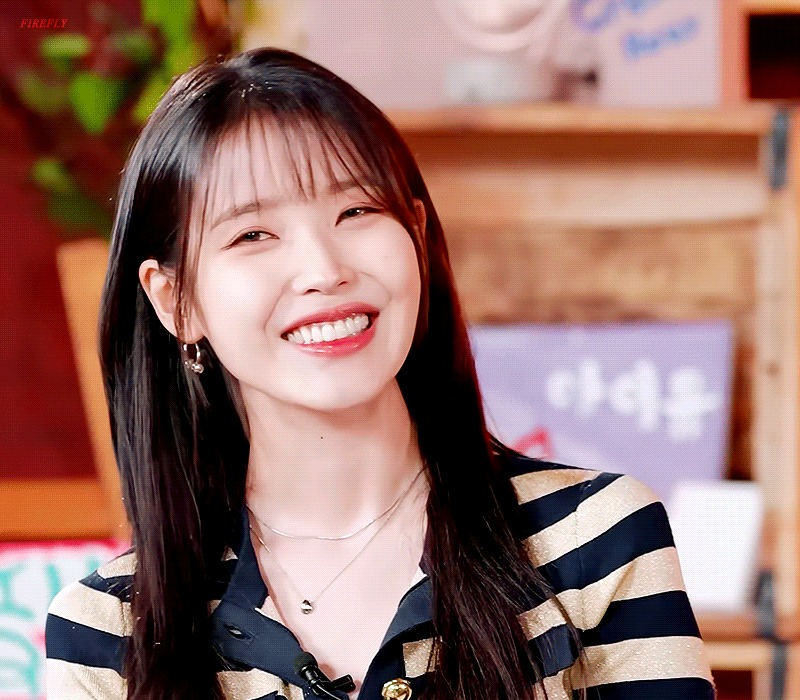

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from deepface import DeepFace
import numpy as np

img = cv2.imread('/content/drive/My Drive/Colab Notebooks/iu5.jpeg')     # 讀取圖片

analyze = DeepFace.analyze(img, actions=['emotion'])  # 辨識圖片人臉資訊
print("\n\n"+'dominant_emotion:',analyze[0]['dominant_emotion'],"(",analyze[0]['emotion'][analyze[0]['dominant_emotion']],")")

cv2_imshow(img)